## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from minisom import MiniSom
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22,22.0,...,0.192154,2017,NaN,38.754263,-9.163397,23,HS,1,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21,20.0,...,0.098647,2015,NaN,38.777761,-9.156197,41,HS,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9,310.0,...,0.497251,2008,NaN,38.785329,-9.127113,36,Phd.,1,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12,499.0,...,0.206713,2010,NaN,38.744086,-9.156589,80,HS,1,11195.0,7
12829,Hilda Huerta,1999-01-01 00:00:00,0,0,0,2,82.0,22.0,21,9.0,...,0.200625,2015,NaN,38.756024,-9.162970,24,HS,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20,18.0,...,0.096366,2008,935162.0,38.734446,-9.171911,48,Phd.,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15,267.0,...,0.118998,2014,NaN,38.767070,-9.144301,37,HS,0,2416.0,0
182,Richard Carter,2000-01-01 00:00:00,0,0,0,2,83.0,23.0,23,23.0,...,0.199432,2016,953891.0,38.728487,-9.164140,23,HS,0,1491.0,0


## 3. Data Scaling and Normalization

In [4]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,longitude,age,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,0,0,0,2,91.0,20.0,22,22.0,195.0,964.0,...,47.0,105.0,85.0,0.192154,2017,-9.163397,23,1,1545.0,0
19330,1,0,0,2,197.0,5958.0,21,20.0,1435.0,434.0,...,45.0,1964.0,85.0,0.098647,2015,-9.156197,41,0,10219.0,1
2272,1,1,0,20,397.0,20.0,9,310.0,379.0,222.0,...,46.0,5.0,408.0,0.497251,2008,-9.127113,36,1,1753.0,2
25288,3,4,1,2,5282.0,237.0,12,499.0,873.0,460.0,...,617.0,1078.0,1956.0,0.206713,2010,-9.156589,80,1,11195.0,7
12829,0,0,0,2,82.0,22.0,21,9.0,172.0,856.0,...,48.0,103.0,83.0,0.200625,2015,-9.162970,24,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0,0,1,2,209.0,5474.0,20,18.0,1435.0,521.0,...,57.0,1984.0,112.0,0.096366,2008,-9.171911,48,1,9730.0,0
26447,0,0,0,3,185.0,1066.0,15,267.0,276.0,287.0,...,50.0,197.0,22.0,0.118998,2014,-9.144301,37,0,2416.0,0
182,0,0,0,2,83.0,23.0,23,23.0,189.0,921.0,...,51.0,94.0,77.0,0.199432,2016,-9.164140,23,0,1491.0,0


In [5]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

### DBSCAN

In [6]:
num_cust_info['dbscan_clustering'] = DBSCAN(
    eps=2, min_samples=400
    ).fit_predict(scaled_data)

In [7]:
num_cust_info['dbscan_clustering'].value_counts()

-1     8644
 9     2502
 3     2419
 6     2384
 1     2332
 2     2293
 4     2278
 11    1842
 7     1802
 5     1140
 8     1112
 10     626
 0      624
Name: dbscan_clustering, dtype: int64

## 4. K-Means

In [8]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

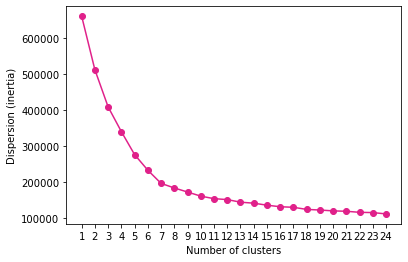

In [9]:
plt.plot(range(1, 25), dispersion, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [7]:
num_cust_info.groupby(['cluster_kmeans']).mean().T

cluster_kmeans,0,1,2,3,4,5,6
kids_home,0.975019,1.126156,0.997693,3.135389,0.246101,0.000000,0.689588
teens_home,0.091983,0.766188,0.271393,1.844926,0.174763,0.000000,0.068547
number_complaints,1.193067,0.331824,1.550545,0.934383,0.199677,0.000000,0.500000
distinct_stores_visited,19.107668,1.994883,7.995386,3.008968,2.424090,1.000000,1.992625
lifetime_spend_groceries,298.047057,967.955324,14984.949664,4997.631015,3168.997849,2.701888,200.406291
lifetime_spend_electronics,19.524012,85.149380,199.983851,199.930446,628.763757,1.149657,4999.557484
typical_hour,9.041053,9.750049,11.915268,17.395888,18.175838,0.000000,20.951844
lifetime_spend_vegetables,290.814291,1415.860461,799.404992,602.100394,282.000717,2.124256,20.033623
lifetime_spend_nonalcohol_drinks,290.993416,38.497933,900.720218,901.103456,327.987453,2.302029,1500.946855
lifetime_spend_alcohol_drinks,204.373741,36.089943,599.076971,500.900919,482.176913,2.704794,499.866161


In [8]:
num_cust_info.mean()

kids_home                                     1.146776
teens_home                                    0.512968
number_complaints                             0.764418
distinct_stores_visited                       6.121108
lifetime_spend_groceries                   3978.899334
lifetime_spend_electronics                  965.303071
typical_hour                                 14.353124
lifetime_spend_vegetables                   564.245311
lifetime_spend_nonalcohol_drinks            628.791908
lifetime_spend_alcohol_drinks               379.369654
lifetime_spend_meat                         513.912460
lifetime_spend_fish                         774.879925
lifetime_spend_hygiene                      162.835290
lifetime_spend_videogames                   536.869491
lifetime_total_distinct_products           1123.962169
percentage_of_products_bought_promotion       0.190981
year_first_transaction                     2008.683912
longitude                                    -9.157744
age       

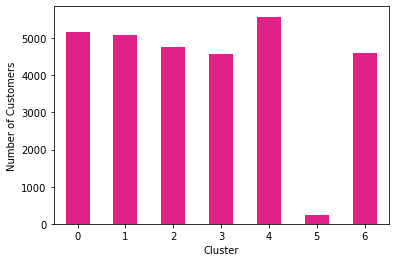

In [9]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

# Association Rules

In [10]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast

In [11]:
# Import utilities
from utils import *

# DATA LOAD NOT WORKING FOR EXCEL

In [12]:
prod_map = pd.read_excel('.\\Data\Product Mapping Excel File.xlsx')
prod_map

<>:1: DeprecationWarning: invalid escape sequence \P
<>:1: DeprecationWarning: invalid escape sequence \P
C:\Users\abdar\AppData\Local\Temp/ipykernel_1584/4010249089.py:1: DeprecationWarning: invalid escape sequence \P
  prod_map = pd.read_excel('.\\Data\Product Mapping Excel File.xlsx')


,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
159,portal,videogames
160,portal 2,videogames
161,final fantasy XX,videogames
162,final fantasy XIX,videogames


In [13]:
# Import dataset
basket = data_load('.\\Data\\Customer Basket Dataset.csv')
basket.head()

,customer_id,invoice_id,list_of_goods
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren..."
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '..."
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',..."
3,1461,6464656,"['pokemon shield', 'white wine', 'google table..."
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',..."


In [18]:
# Create list of lists
list_of_goods = [ast.literal_eval(product) for product in basket["list_of_goods"].values]
list_of_goods

[['fresh bread',
  'cake',
  'grated cheese',
  'french fries',
  'whole wheat pasta',
  'candy bars',
  'beats headphones',
  'half-life 2',
  'phone car charger',
  'cream',
  'cereals',
  'babies food'],
 ['bramble',
  'beer',
  'white wine',
  'almonds',
  'half-life: alyx',
  'cauliflower',
  'cider',
  'yogurt cake',
  'champagne',
  'chili',
  'soda',
  'black beer',
  'catfish'],
 ['fromage blanc',
  'olive oil',
  'tomato sauce',
  'avocado',
  'megaman zero 2',
  'cooking oil',
  'iPad',
  'shampoo',
  'oil',
  'green tea'],
 ['pokemon shield',
  'white wine',
  'google tablet',
  'canned_tuna',
  'green beans',
  'bacon',
  'cider',
  'pokemon sword',
  'beats headphones',
  'airpods',
  'phone charger',
  'metroid prime'],
 ['olive oil',
  'deodorant',
  'whole weat flour',
  'chutney',
  'escalope',
  'gums',
  'rice',
  'airpods',
  'oil',
  'cookies',
  'muffins',
  'laptop'],
 ['ratchet & clank 2',
  'megaman zero',
  'eggplant',
  'body spray',
  'barbecue sauce',
  's

In [19]:
# Separate train and test datasets
train = list_of_goods[:int(len(list_of_goods)*0.8)]
test = list_of_goods[int(len(list_of_goods)*0.8):]

In [20]:
# See size of each dataset
print('We have {} rows in the train set.'.format(len(train)))
print('We have {} rows in the test set.'.format(len(test)))

We have 64000 rows in the train set.
We have 16000 rows in the test set.


In [21]:
# Encoding our data
te = TransactionEncoder()
te_fit = te.fit(train).transform(train)
transactions_items = pd.DataFrame(te_fit, columns=te.columns_)

In [22]:
# Viewing our transactions_items
transactions_items.head(10)

,airpods,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,beats headphones,beer,...,vacuum cleaner,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
# Using 5% as minimum support and obtaining frequent_itemsets_grocery
# In real life scenario, support is typically a value between 3% to 8%, depending
# on the dataset
frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.05, use_colnames=True
    )

In [24]:
frequent_itemsets_grocery.sort_values(by='support', ascending=False)

,support,itemsets
34,0.465625,(oil)
14,0.464234,(cooking oil)
5,0.361203,(cake)
6,0.299484,(candy bars)
101,0.297656,"(cooking oil, oil)"
...,...,...
134,0.050422,"(gums, candy bars, cake)"
44,0.050328,(ratchet & clank 2)
147,0.050297,"(cooking oil, candy bars, napkins)"
10,0.050172,(champagne)


In [25]:
# We'll use a confidence level of 20%
rules_grocery = association_rules(frequent_itemsets_grocery, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [26]:
rules_grocery

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(carrots),(asparagus),0.105656,0.147078,0.059687,0.564922,3.840963,0.044148,1.960387
1,(asparagus),(carrots),0.147078,0.105656,0.059687,0.405822,3.840963,0.044148,1.505177
2,(tomatoes),(asparagus),0.132406,0.147078,0.079359,0.599363,4.075132,0.059885,2.128913
3,(asparagus),(tomatoes),0.147078,0.132406,0.079359,0.539573,4.075132,0.059885,1.884324
4,(babies food),(cake),0.248984,0.361203,0.122609,0.492438,1.363327,0.032675,1.258559
...,...,...,...,...,...,...,...,...,...
269,"(cooking oil, cake)","(gums, oil)",0.227734,0.159484,0.053875,0.236569,1.483339,0.017555,1.100972
270,"(gums, oil)","(cooking oil, cake)",0.159484,0.227734,0.053875,0.337807,1.483339,0.017555,1.166225
271,"(gums, cake)","(cooking oil, oil)",0.122297,0.297656,0.053875,0.440526,1.479984,0.017473,1.255365
272,"(oil, cake)","(cooking oil, gums)",0.228047,0.157969,0.053875,0.236245,1.495519,0.017851,1.102489


In [27]:
frequent_itemsets_grocery_iter_2 = apriori(
    transactions_items, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_iter_2 = association_rules(frequent_itemsets_grocery_iter_2, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [28]:
rules_grocery_iter_2.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1052,"(tomatoes, mashed potato)","(carrots, asparagus)",0.041719,0.059687,0.020422,0.489513,8.201267,0.017932,1.841991
1049,"(carrots, asparagus)","(tomatoes, mashed potato)",0.059687,0.041719,0.020422,0.342147,8.201267,0.017932,1.456679
1050,"(carrots, mashed potato)","(tomatoes, asparagus)",0.031703,0.079359,0.020422,0.644160,8.116995,0.017906,2.587230
1051,"(tomatoes, asparagus)","(carrots, mashed potato)",0.079359,0.031703,0.020422,0.257334,8.116995,0.017906,1.303812
1048,"(carrots, tomatoes)","(asparagus, mashed potato)",0.067125,0.037500,0.020422,0.304236,8.112973,0.017905,1.383372
1053,"(asparagus, mashed potato)","(carrots, tomatoes)",0.037500,0.067125,0.020422,0.544583,8.112973,0.017905,2.048399
1037,"(pokemon shield, ratchet & clank)",(pokemon sword),0.023844,0.122453,0.021047,0.882700,7.208472,0.018127,7.481210
1031,"(pokemon shield, pokemon violet)",(pokemon sword),0.039594,0.122453,0.034828,0.879637,7.183458,0.029980,7.290832
1032,(pokemon sword),"(pokemon shield, pokemon violet)",0.122453,0.039594,0.034828,0.284420,7.183458,0.029980,1.342137
1026,"(pokemon scarlet, pokemon violet)",(pokemon sword),0.024750,0.122453,0.021766,0.879419,7.181680,0.018735,7.277666


In [29]:
train_data_rules = rules_grocery_iter_2[['antecedents','consequents','lift']]

In [30]:
te = TransactionEncoder()
te_fit_test = te.fit(test).transform(test)
transactions_items_test = pd.DataFrame(te_fit_test, columns=te.columns_)

frequent_itemsets_test = apriori(
    transactions_items_test, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_test = association_rules(frequent_itemsets_test, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [31]:
test_data_rules = rules_grocery_test[['antecedents','consequents','lift']]
test_data_rules.columns = ['antecedents','consequents','lift_test']

In [32]:
evaluation = train_data_rules.merge(
    test_data_rules,
    on=['antecedents','consequents']
)

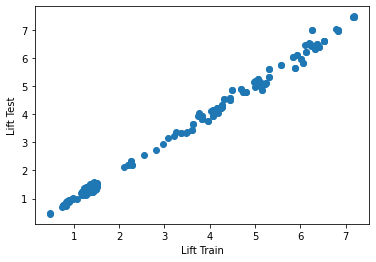

In [33]:
plt.scatter(
    evaluation.lift,
    evaluation.lift_test
)

plt.xlabel('Lift Train')
plt.ylabel('Lift Test')
plt.show()

In [34]:
(np.abs(evaluation.lift-evaluation.lift_test)/evaluation.lift).mean()

0.02835642641470029

In [35]:
rules_grocery_iter_2.sort_values(by='support', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,(cooking oil),(oil),0.464234,0.465625,0.297656,0.641177,1.377024,0.081497,1.489243
183,(oil),(cooking oil),0.465625,0.464234,0.297656,0.639262,1.377024,0.081497,1.485192
81,(oil),(cake),0.465625,0.361203,0.228047,0.489765,1.355927,0.059862,1.251966
82,(cake),(oil),0.361203,0.465625,0.228047,0.631354,1.355927,0.059862,1.449560
62,(cake),(cooking oil),0.361203,0.464234,0.227734,0.630488,1.358125,0.060051,1.449929
61,(cooking oil),(cake),0.464234,0.361203,0.227734,0.490559,1.358125,0.060051,1.253917
117,(oil),(candy bars),0.465625,0.299484,0.188797,0.405470,1.353893,0.049349,1.178268
118,(candy bars),(oil),0.299484,0.465625,0.188797,0.630406,1.353893,0.049349,1.445845
100,(candy bars),(cooking oil),0.299484,0.464234,0.187453,0.625920,1.348284,0.048422,1.432220
99,(cooking oil),(candy bars),0.464234,0.299484,0.187453,0.403790,1.348284,0.048422,1.174947


# No ECLAT yet or maybe not needed

## Association Rules by cluster

In [14]:
# Join datasets
cust_clust = basket.join(num_cust_info, on='customer_id')
cust_clust

,customer_id,invoice_id,list_of_goods,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,longitude,age,female,total_lifetime_spend,number_dependents,cluster_kmeans
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren...",5.0,2.0,1.0,3.0,4880.0,193.0,18.0,...,980.0,1923.0,0.200289,2004.0,-9.169520,35.0,1.0,10824.0,7.0,3.0
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '...",0.0,1.0,0.0,2.0,1509.0,586.0,1.0,...,207.0,87.0,0.080874,2012.0,-9.131744,81.0,1.0,3544.0,1.0,1.0
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',...",0.0,0.0,0.0,5.0,6955.0,1174.0,20.0,...,539.0,460.0,0.148709,2006.0,-9.095142,33.0,0.0,11648.0,0.0,4.0
3,1461,6464656,"['pokemon shield', 'white wine', 'google table...",0.0,0.0,0.0,2.0,181.0,4773.0,21.0,...,2078.0,88.0,0.098668,2007.0,-9.174885,43.0,0.0,9227.0,0.0,6.0
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',...",1.0,1.0,1.0,20.0,499.0,20.0,10.0,...,5.0,528.0,0.500013,2008.0,-9.181123,83.0,0.0,1700.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,360,11470275,"['tomatoes', 'ham', 'zucchini', 'frozen vegeta...",1.0,1.0,0.0,2.0,1146.0,47.0,9.0,...,54.0,218.0,0.049697,2010.0,-9.183154,39.0,1.0,2909.0,2.0,1.0
79996,3116,7483644,"['pet food', 'soup', 'beer', 'fromage blanc', ...",0.0,0.0,0.0,3.0,6950.0,995.0,17.0,...,528.0,648.0,0.155770,2011.0,-9.192923,27.0,1.0,11200.0,0.0,4.0
79997,1546,9168204,"['cake', 'french fries', 'cooking oil', 'muffi...",0.0,0.0,1.0,3.0,5019.0,205.0,20.0,...,967.0,2013.0,0.199767,2012.0,-9.150733,77.0,1.0,10719.0,0.0,4.0
79998,7242,5054623,"['fromage blanc', 'napkins', 'sandwich', 'hone...",1.0,0.0,1.0,8.0,15549.0,198.0,12.0,...,53.0,3538.0,0.150241,2001.0,-9.136822,74.0,0.0,21688.0,1.0,2.0


In [23]:
def rules_cluster(cust_clust, cluster_n):
    # Select cluster data
    cluster = cust_clust[cust_clust['cluster_kmeans'] == cluster_n]

    list_of_goods = [ast.literal_eval(product) for product in cluster["list_of_goods"].values]
    
    # Separate train and test datasets
    train = list_of_goods[:int(len(list_of_goods)*0.8)]
    test = list_of_goods[int(len(list_of_goods)*0.8):]
    
    te = TransactionEncoder()
    te_fit = te.fit(train).transform(train)
    transactions_items = pd.DataFrame(te_fit, columns=te.columns_)
    
    frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.04, use_colnames=True
    )
    
    rules_grocery = association_rules(frequent_itemsets_grocery, 
                                  metric="confidence", 
                                  min_threshold=0.2)
    
    train_data_rules = rules_grocery[['antecedents','consequents','lift']]
    
    te = TransactionEncoder()
    te_fit_test = te.fit(test).transform(test)
    transactions_items_test = pd.DataFrame(te_fit_test, columns=te.columns_)

    frequent_itemsets_test = apriori(
        transactions_items_test, min_support=0.02, use_colnames=True
        )

    # We'll use a confidence level of 20%
    rules_grocery_test = association_rules(frequent_itemsets_test, 
                                      metric="confidence", 
                                      min_threshold=0.2)
    
    test_data_rules = rules_grocery_test[['antecedents','consequents','lift']]
    test_data_rules.columns = ['antecedents','consequents','lift_test']
    
    evaluation = train_data_rules.merge(
    test_data_rules,
    on=['antecedents','consequents']
    )
    
    plt.scatter(
    evaluation.lift,
        evaluation.lift_test
    )

    plt.xlabel('Lift Train')
    plt.ylabel('Lift Test')
    plt.show()
    
    return rules_grocery

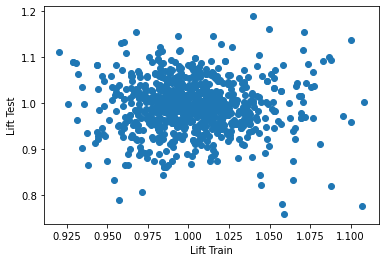

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,(oil),(cooking oil),0.865401,0.664434,0.573874,0.663131,0.998039,-0.001128,0.996132
96,(cooking oil),(oil),0.664434,0.865401,0.573874,0.863704,0.998039,-0.001128,0.987549
32,(oil),(cake),0.865401,0.506637,0.435678,0.503440,0.993691,-0.002766,0.993563
31,(cake),(oil),0.506637,0.865401,0.435678,0.859941,0.993691,-0.002766,0.961016
62,(candy bars),(oil),0.419303,0.865401,0.364471,0.869231,1.004425,0.001606,1.029284
61,(oil),(candy bars),0.865401,0.419303,0.364471,0.421158,1.004425,0.001606,1.003205
16,(cooking oil),(cake),0.664434,0.506637,0.338668,0.509709,1.006063,0.002041,1.006265
15,(cake),(cooking oil),0.506637,0.664434,0.338668,0.668462,1.006063,0.002041,1.012151
140,(gums),(oil),0.348592,0.865401,0.302444,0.867616,1.002559,0.000772,1.016727
141,(oil),(gums),0.865401,0.348592,0.302444,0.349484,1.002559,0.000772,1.001371


In [24]:
ruler_grocery_0 = rules_cluster(cust_clust, 0)
ruler_grocery_0.sort_values(by='support', ascending=False).head(20)

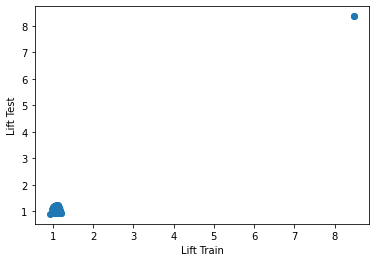

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(tomatoes),(asparagus),0.802946,0.698849,0.607253,0.756282,1.082182,0.046116,1.235653
36,(asparagus),(tomatoes),0.698849,0.802946,0.607253,0.868934,1.082182,0.046116,1.503469
78,(tomatoes),(carrots),0.802946,0.600446,0.521723,0.649761,1.082131,0.039598,1.140805
79,(carrots),(tomatoes),0.600446,0.802946,0.521723,0.868893,1.082131,0.039598,1.503002
5,(asparagus),(carrots),0.698849,0.600446,0.454017,0.649663,1.081969,0.034396,1.140487
6,(carrots),(asparagus),0.600446,0.698849,0.454017,0.756133,1.081969,0.034396,1.234898
228,(carrots),"(tomatoes, asparagus)",0.600446,0.607253,0.397203,0.661513,1.089353,0.032580,1.160301
224,"(tomatoes, carrots)",(asparagus),0.521723,0.698849,0.397203,0.761329,1.089404,0.032597,1.261781
223,"(tomatoes, asparagus)",(carrots),0.607253,0.600446,0.397203,0.654097,1.089353,0.032580,1.155105
225,"(asparagus, carrots)",(tomatoes),0.454017,0.802946,0.397203,0.874864,1.089567,0.032652,1.574715


In [25]:
ruler_grocery_1 = rules_cluster(cust_clust, 1)
ruler_grocery_1.sort_values(by='support', ascending=False).head(20)

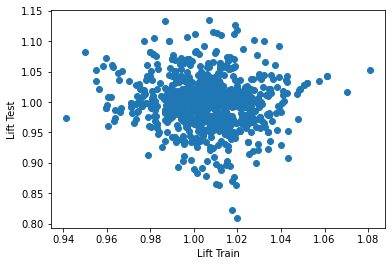

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(cooking oil),(oil),0.657477,0.875163,0.576016,0.876100,1.001071,0.000616,1.007562
92,(oil),(cooking oil),0.875163,0.657477,0.576016,0.658181,1.001071,0.000616,1.002059
28,(oil),(cake),0.875163,0.505694,0.443089,0.506293,1.001184,0.000524,1.001213
27,(cake),(oil),0.505694,0.875163,0.443089,0.876200,1.001184,0.000524,1.008372
56,(oil),(candy bars),0.875163,0.422491,0.369594,0.422314,0.999582,-0.000155,0.999694
57,(candy bars),(oil),0.422491,0.875163,0.369594,0.874797,0.999582,-0.000155,0.997078
13,(cooking oil),(cake),0.657477,0.505694,0.334246,0.508377,1.005305,0.001764,1.005456
12,(cake),(cooking oil),0.505694,0.657477,0.334246,0.660965,1.005305,0.001764,1.010287
136,(gums),(oil),0.352667,0.875163,0.309229,0.876831,1.001905,0.000588,1.013538
137,(oil),(gums),0.875163,0.352667,0.309229,0.353339,1.001905,0.000588,1.001039


In [26]:
ruler_grocery_2 = rules_cluster(cust_clust, 2)
ruler_grocery_2.sort_values(by='support', ascending=False).head(20)

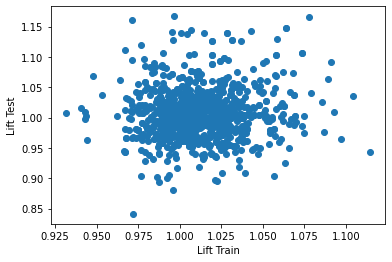

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(cooking oil),(babies food),0.655253,0.876816,0.574912,0.877390,1.000654,0.000376,1.004676
14,(babies food),(cooking oil),0.876816,0.655253,0.574912,0.655681,1.000654,0.000376,1.001244
6,(babies food),(cake),0.876816,0.512611,0.448555,0.511573,0.997975,-0.000910,0.997875
7,(cake),(babies food),0.512611,0.876816,0.448555,0.875041,0.997975,-0.000910,0.985790
8,(babies food),(candy bars),0.876816,0.416736,0.367797,0.419469,1.006556,0.002396,1.004706
9,(candy bars),(babies food),0.416736,0.876816,0.367797,0.882565,1.006556,0.002396,1.048952
64,(cake),(cooking oil),0.512611,0.655253,0.335477,0.654448,0.998771,-0.000413,0.997669
65,(cooking oil),(cake),0.655253,0.512611,0.335477,0.511981,0.998771,-0.000413,0.998709
28,(gums),(babies food),0.355270,0.876816,0.313179,0.881523,1.005368,0.001672,1.039728
27,(babies food),(gums),0.876816,0.355270,0.313179,0.357177,1.005368,0.001672,1.002967


In [27]:
ruler_grocery_3 = rules_cluster(cust_clust, 3)
ruler_grocery_3.sort_values(by='support', ascending=False).head(20)

In [ ]:
ruler_grocery_4 = rules_cluster(cust_clust, 4)
ruler_grocery_4.sort_values(by='support', ascending=False).head(20)

In [ ]:
ruler_grocery_5 = rules_cluster(cust_clust, 5)
ruler_grocery_5.sort_values(by='support', ascending=False).head(20)

In [ ]:
ruler_grocery_6 = rules_cluster(cust_clust, 6)
ruler_grocery_6.sort_values(by='support', ascending=False).head(20)

# missing

In [ ]:
(np.abs(evaluation.lift-evaluation.lift_test)/evaluation.lift).mean()

In [ ]:
# + combinations of 2 and 3 and 4....